# Image Processing with OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("./images/Healthy MRI Raw.png")
image

array([[[ 9,  9,  9],
        [20, 20, 20],
        [11, 11, 11],
        ...,
        [16, 16, 16],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 7,  7,  7],
        [ 4,  4,  4],
        [ 9,  9,  9]],

       [[ 2,  2,  2],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [ 8,  8,  8],
        [ 4,  4,  4],
        [ 0,  0,  0]],

       ...,

       [[12, 12, 12],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [ 8,  8,  8],
        [ 5,  5,  5],
        [ 0,  0,  0]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 0,  0,  0]],

       [[ 6,  6,  6],
        [ 0,  0,  0],
        [ 5,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)

In [3]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_rgb

array([[[ 9,  9,  9],
        [20, 20, 20],
        [11, 11, 11],
        ...,
        [16, 16, 16],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[ 6,  6,  6],
        [ 4,  4,  4],
        [ 4,  4,  4],
        ...,
        [ 7,  7,  7],
        [ 4,  4,  4],
        [ 9,  9,  9]],

       [[ 2,  2,  2],
        [ 5,  5,  5],
        [ 4,  4,  4],
        ...,
        [ 8,  8,  8],
        [ 4,  4,  4],
        [ 0,  0,  0]],

       ...,

       [[12, 12, 12],
        [ 8,  8,  8],
        [ 6,  6,  6],
        ...,
        [ 8,  8,  8],
        [ 5,  5,  5],
        [ 0,  0,  0]],

       [[ 4,  4,  4],
        [ 4,  4,  4],
        [ 5,  5,  5],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 0,  0,  0]],

       [[ 6,  6,  6],
        [ 0,  0,  0],
        [ 5,  5,  5],
        ...,
        [ 0,  0,  0],
        [ 4,  4,  4],
        [ 5,  5,  5]]], dtype=uint8)

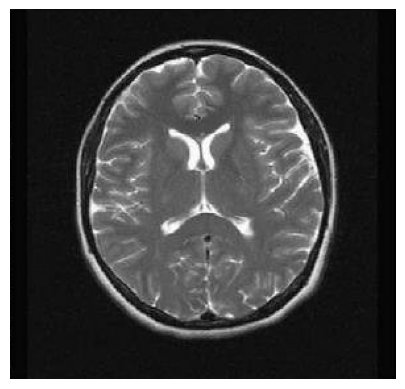

In [4]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

With OpenCV, the image is stored directly as a 3D array. Notice that the first two dimensions, 281x293, are the regular dimensions of the image, and the third dimension is the color channel. It also uses a `numpy.ndarray` as the data structure representing this 3D array, which provide a number of computational and convenience benefits. 

In [5]:
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(281, 293, 3)


### Grayscale Conversion
Convert the image to grayscale, which can sometimes help in simplifying the analysis.

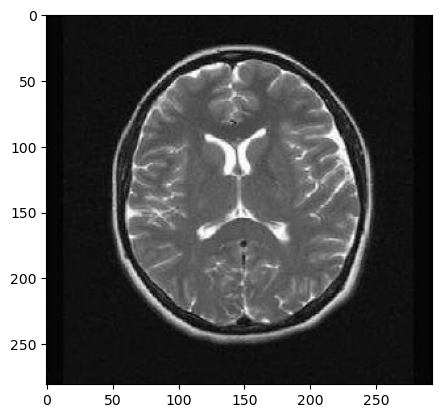

In [6]:
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayscale_image, cmap='gray')

### Histogram Equalization
This can improve the contrast of an image. It's particularly useful for medical images where you want to visualize small contrast changes.

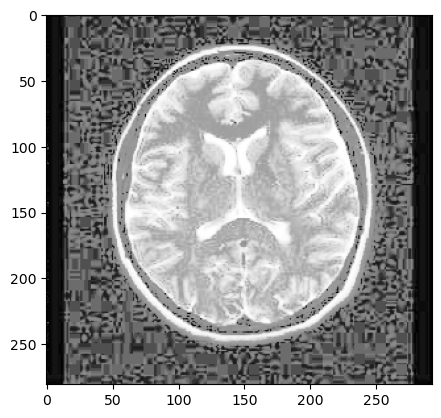

In [7]:
equalized_image = cv2.equalizeHist(grayscale_image)
plt.imshow(equalized_image, cmap='gray')

### Edge Detection
Using the Canny edge detector, you can highlight the edges in the image, which can help in identifying structures in MRIs.

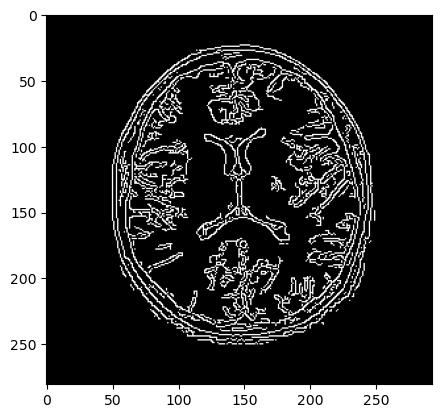

In [8]:
edges = cv2.Canny(grayscale_image, 50, 150)
plt.imshow(edges, cmap='gray')

### Smoothing
Blur or smooth an image to reduce noise. Useful if the MRI has lots of high-frequency noise.

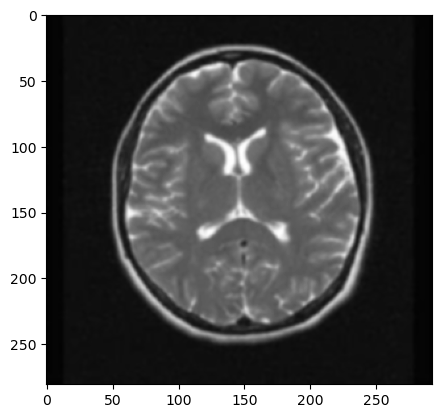

In [9]:
blurred_image = cv2.GaussianBlur(grayscale_image, (5,5), 0)
plt.imshow(blurred_image, cmap='gray')

### Thresholding
Convert the grayscale image to a binary image based on pixel intensity. Everything below the threshold becomes black (0), and everything above becomes white (255).

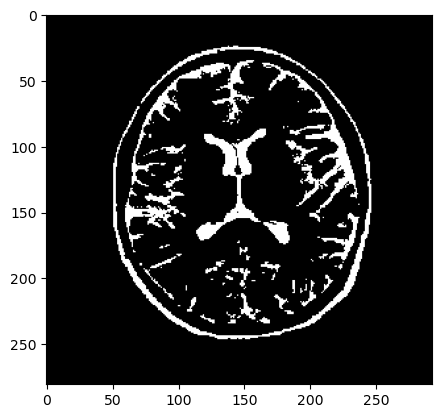

In [10]:
_, thresholded_image = cv2.threshold(grayscale_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image, cmap='gray')

### Morphological Operations
Erosion and dilation are fundamental morphological operations. They can be useful to emphasize or reduce certain features:
* Erosion: Reduces the size of the foreground objects. Useful for removing small noises.

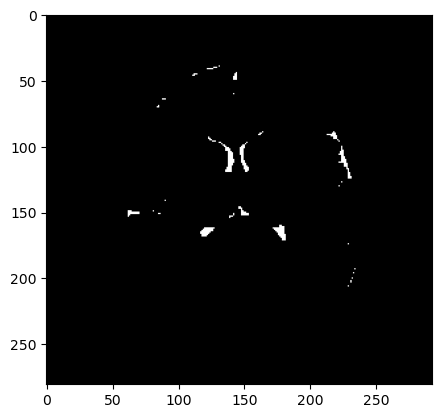

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
eroded_image = cv2.erode(thresholded_image, kernel, iterations=1)
plt.imshow(eroded_image, cmap='gray')

* **Dilation**: Increases the size of the foreground objects. Useful for filling holes in objects.

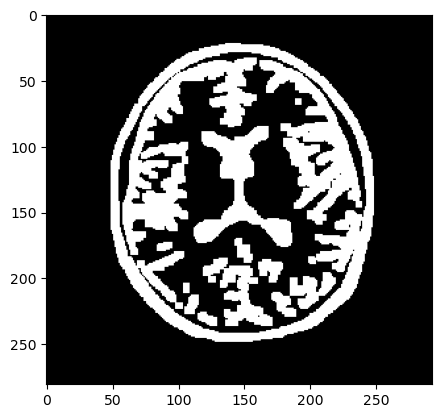

In [12]:
dilated_image = cv2.dilate(thresholded_image, kernel, iterations=1)
plt.imshow(dilated_image, cmap='gray')

### Image Segmentation
K-means clustering is one method for segmentation. For MRI, this can help segment out different tissues or areas of interest.

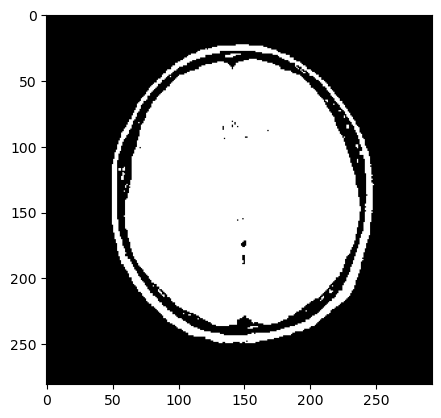

In [13]:
# Reshaping the image to be a list of pixels
pixels = grayscale_image.reshape((-1, 1))
pixels = np.float32(pixels)

# Applying kmeans clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixels, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(grayscale_image.shape)
plt.imshow(segmented_image, cmap='gray')

These are just some of the many operations OpenCV offers. Depending on your MRI and what you're looking to achieve, you can combine these operations, tweak their parameters, or explore even more functions available in OpenCV.